In [1]:
import requests
import json

import requests
import urllib.parse
import geopandas as gpd

In [2]:

BASE_URL = "https://gis.dnr.wa.gov/site2/rest/services/Public_Forest_Mgmt/WADNR_PUBLIC_RS_FRIS_POLY_OpenData/FeatureServer/query"
params = dict(
    layerDefs='RS-FRIS_Polygon',
    geometryType='esriGeometryEnvelope',
    geometry='-120.43750494996529, 47.124998730763856, -120.37500475840281, 47.187498706510354',
    inSR='4326',
    returnGeometry='true',
    f='json'
)
# url_final = BASE_URL + urllib.parse.urlencode(params)

In [3]:
# r = requests.get(BASE_URL, params=params)

In [4]:
# data = json.loads((r.text))

In [5]:
# pd.DataFrame(data['layers'][0]['Features'])

In [6]:
# fris = gpd.read_file(data['layers'])
# data.keys()
import pandas as pd

In [7]:
# data['layers'][0].keys()

In [8]:
# import geopandas as gpd

In [9]:
fris = gpd.read_file(
    '/mnt/data/FESDataRepo/raw/rs_fris/'
    'rs_fris_polygon.geojson'
)

In [10]:
fris.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
grid = gpd.read_file(
    '/home/ygalvan/Data/interim/usgs_grid/'
    'USGS_CellGrid_3_75Minute_WA_epsg4326.geojson'
).to_crs('EPSG:3857')

<AxesSubplot: >

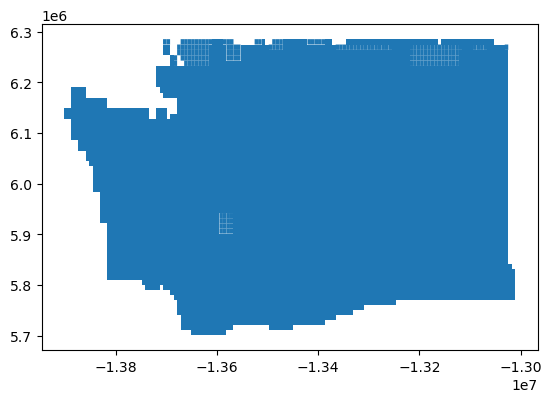

In [12]:
grid.plot()

In [13]:
from shapely.geometry import box

In [14]:
diss = fris[['OBJECTID', 'geometry']].dissolve()

In [15]:
# fris_union = fris.unary_union
# for bbox in grid.geometry:
#     # b = box(*bbox.bounds)
#     if bbox.intersects(fris_union):
#         print('yes')
#     break

In [16]:
diss

,geometry,OBJECTID
0,"MULTIPOLYGON (((-13853611.26125 6072738.59047,...",1


In [17]:
ovly = gpd.overlay(grid, diss, how='intersection')

/tmp/ipykernel_815289/2975471196.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:3857
Right CRS: EPSG:4326

  ovly = gpd.overlay(grid, diss, how='intersection')


In [18]:
len(ovly.CELL_ID.unique())

2824

In [19]:
ovly

,OBJECTID_1,CELL_ID,CELL_NAME,PRIMARY_STATE,CELL_MAPCODE,CELL_TYPE,CELL_ALLWATER,CELL_DESCRIPTION,CELL_DIACRITIC,GLOBALID,SHAPE_Length,SHAPE_Area,OBJECTID_2,geometry
0,1000,221799,North Bend NE,Washington,47121-D7,1.0,2.0,None,None,{10A76988-D397-11DE-9C20-00144F233E68},0.25,0.003906,1,"MULTIPOLYGON (((-13553147.819 6024072.577, -13..."
1,1025,209961,Methow NW,Washington,48120-B1,1.0,2.0,None,None,{10AB4479-D397-11DE-9C20-00144F233E68},0.25,0.003906,1,"MULTIPOLYGON (((-13365296.621 6148546.947, -13..."
2,1026,209962,Methow SW,Washington,48120-B1,1.0,2.0,None,None,{10AB71EA-D397-11DE-9C20-00144F233E68},0.25,0.003906,1,"MULTIPOLYGON (((-13365296.644 6138104.833, -13..."
3,1027,209964,Methow SE,Washington,48120-B1,1.0,2.0,None,None,{10AB946A-D397-11DE-9C20-00144F233E68},0.25,0.003906,1,"MULTIPOLYGON (((-13365296.644 6138104.833, -13..."
4,1342,210172,Mica Peak SE,Idaho,47117-E1,1.0,2.0,None,None,{10E10766-D397-11DE-9C20-00144F233E68},0.25,0.003906,1,"POLYGON ((-13031338.056 6030053.611, -13031190..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2819,253502,312157,Thrapp Mountain NW,Washington,48119-C8,1.0,2.0,None,None,{C227BA32-D397-11DE-9C20-00144F233E68},0.25,0.003906,1,"POLYGON ((-13355198.079 6166702.162, -13355197..."
2820,253503,312159,Thrapp Mountain NE,Washington,48119-C8,1.0,2.0,None,None,{C227E54A-D397-11DE-9C20-00144F233E68},0.25,0.003906,1,"MULTIPOLYGON (((-13344424.147 6169469.540, -13..."
2821,253678,320027,Wapato NE,Washington,46120-D4,1.0,2.0,None,None,{C245F21C-D397-11DE-9C20-00144F233E68},0.25,0.003906,1,"MULTIPOLYGON (((-13400115.598 5859449.133, -13..."
2822,253728,297564,Winchester NE SE,Washington,47119-B5,1.0,2.0,None,None,{C2507886-D397-11DE-9C20-00144F233E68},0.25,0.003906,1,"MULTIPOLYGON (((-13302679.493 5972732.313, -13..."


In [20]:
import matplotlib.pyplot as plt

<AxesSubplot: >

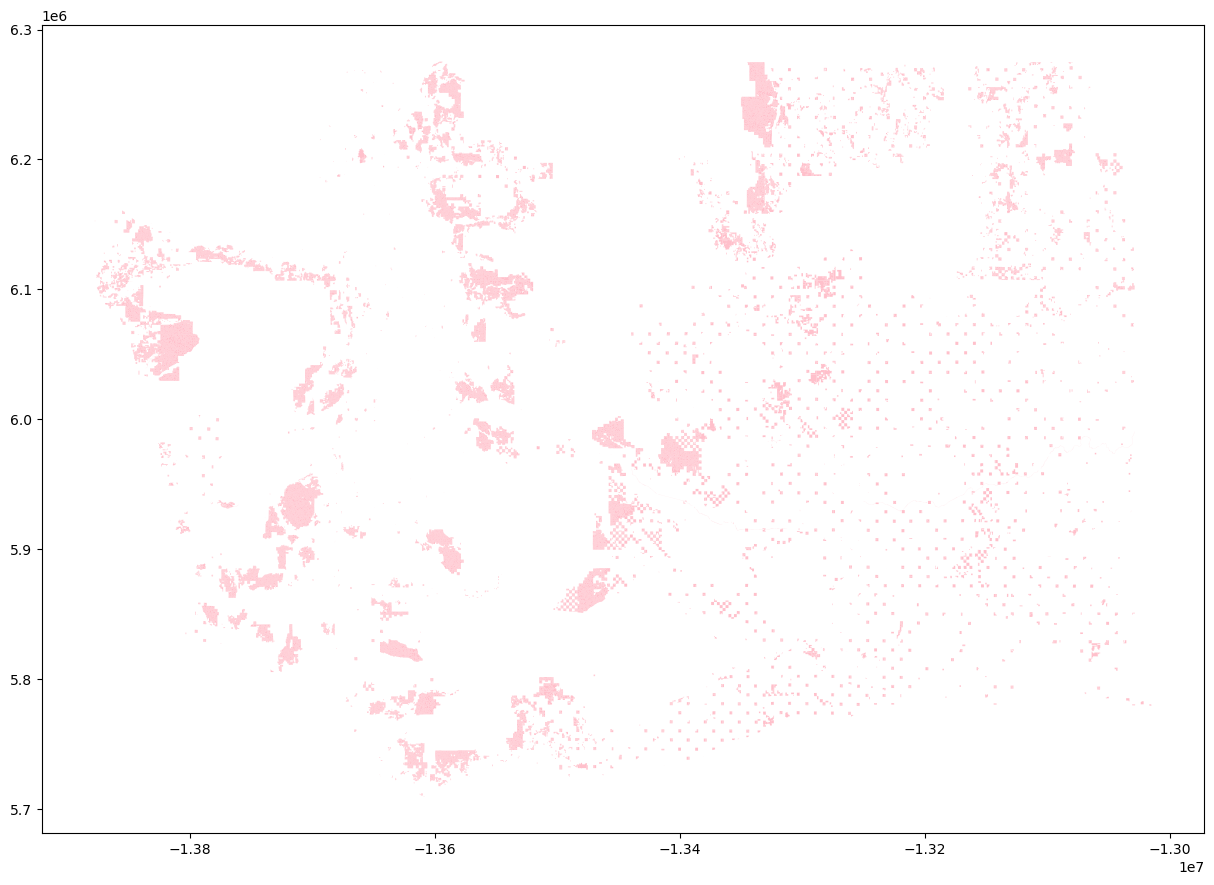

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
# grid.plot(ax=ax)
ovly.plot(ax=ax, color="pink")

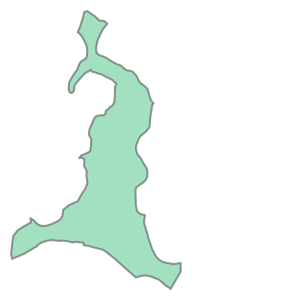

In [ ]:
ovly.geometry[0]

<AxesSubplot: >

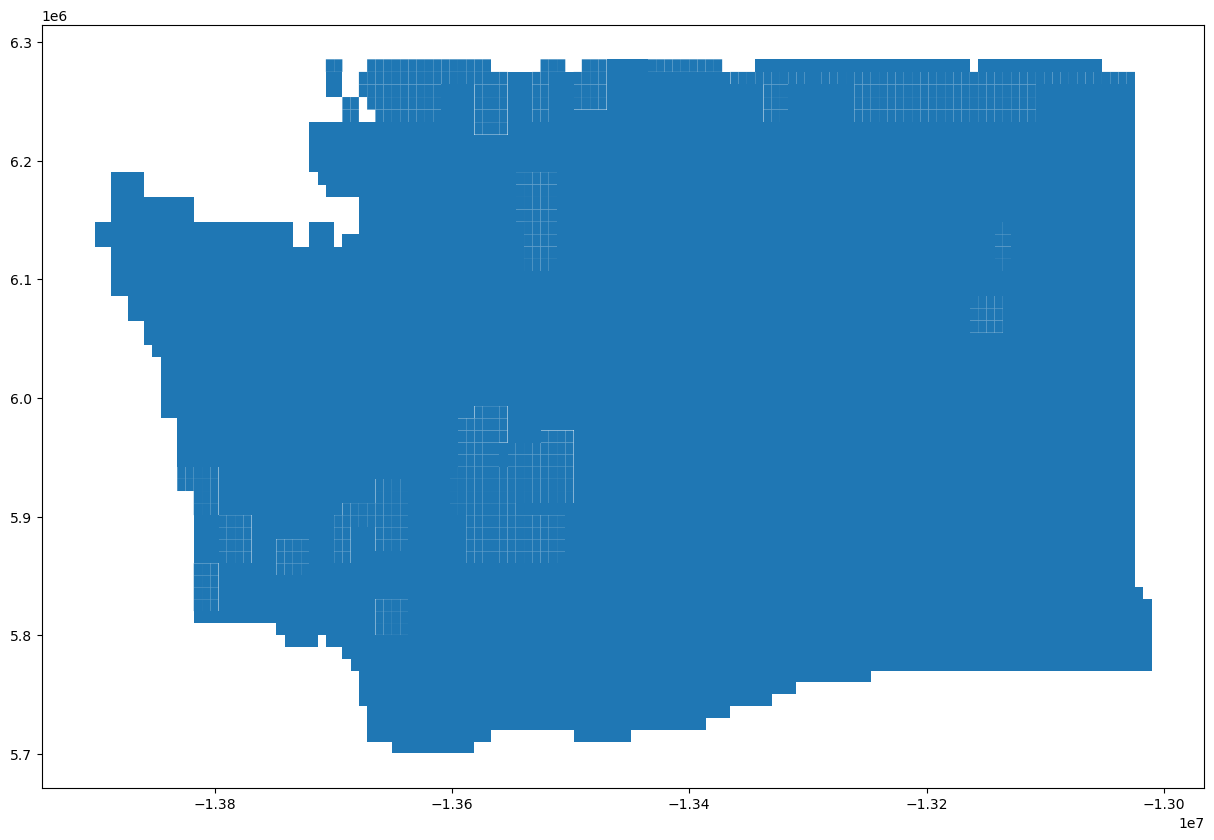

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
grid.plot(ax=ax)

In [7]:
import fiona 
import geopandas as gpd

gdb_file = '/mnt/data/FESDataRepo/raw/blm/forest_MicroStorms_veg_pub.gdb'
# Get all the layers from the .gdb file 
layers = fiona.listlayers(gdb_file)

for layer in layers:
    gdf = gpd.read_file(gdb_file, layer='FOIVEG_PUB_POLY')
    # Do stuff with the gdf

In [9]:
gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands